В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [2]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv') 
non_smoker_df = medical_df[medical_df.smoker == 'no']

Метод найменших квадратів:

In [60]:
X = non_smoker_df['age'].values.reshape(-1, 1)
y = non_smoker_df['charges'].values
X, y

(array([[18],
        [28],
        [33],
        ...,
        [18],
        [18],
        [21]], dtype=int64),
 array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
         1629.8335 ,  2007.945  ]))

In [62]:
import numpy as np
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [63]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
MNK_coefs = normal_equations(X_with_intercept, y)

In [64]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [65]:
pred_MNK = np.dot(X_with_intercept, MNK_coefs)

In [66]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y, pred_MNK, squared=False)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 4662.51


Градієнтний спуск:

In [67]:
def full_batch_gradient_descent(X, y, lr=0.01, epochs=100):
    m, b = 0.0, 0.0  
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.00014, epochs=10000)
predictions_fbgd_1 = m * X[:, 0] + b
m, b

(232.87122598803288, -564.5810854534529)

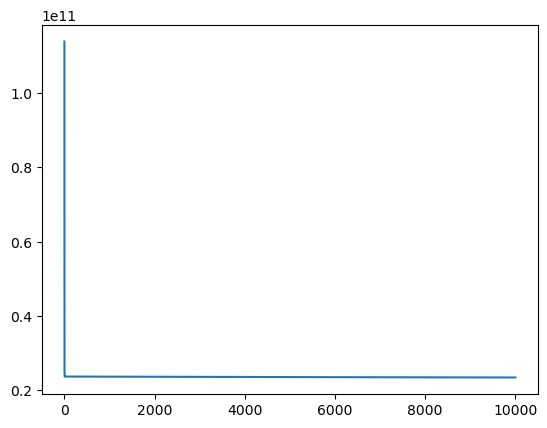

In [68]:
plt.plot(errors);

In [69]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.0005, epochs=10000)
predictions_fbgd_2 = m * X[:, 0] + b
m, b

(252.03525579435097, -1415.7261106360409)

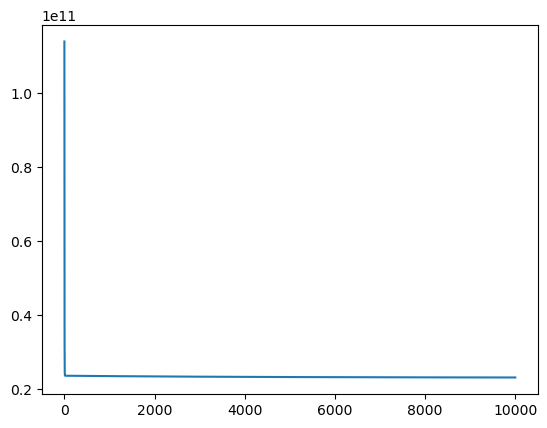

In [70]:
plt.plot(errors);

In [71]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.00006, epochs=100000)
predictions_fbgd_3 = m * X[:, 0] + b
m, b

(255.11727911692964, -1552.6100982431103)

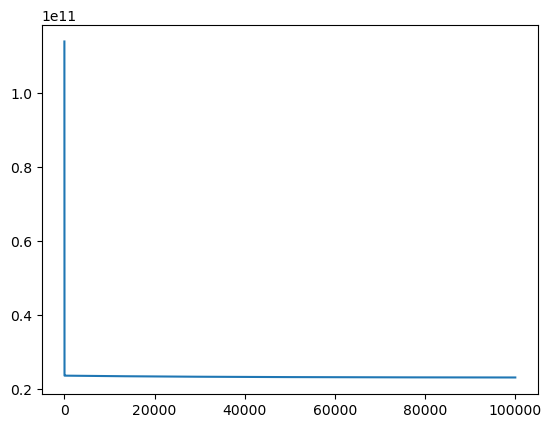

In [72]:
plt.plot(errors);

Найближчий результат до того, що вийшов у градієнтному спуску, вийшов, коли я дала найменший крок і найбільшу кількість ітерацій

З `scikit-learn.LinearRegression`

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lin_reg = LinearRegression()

In [75]:
lin_reg.fit(X, y)

LinearRegression()

In [76]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [77]:
predictions_sklearn = lin_reg.predict(X)

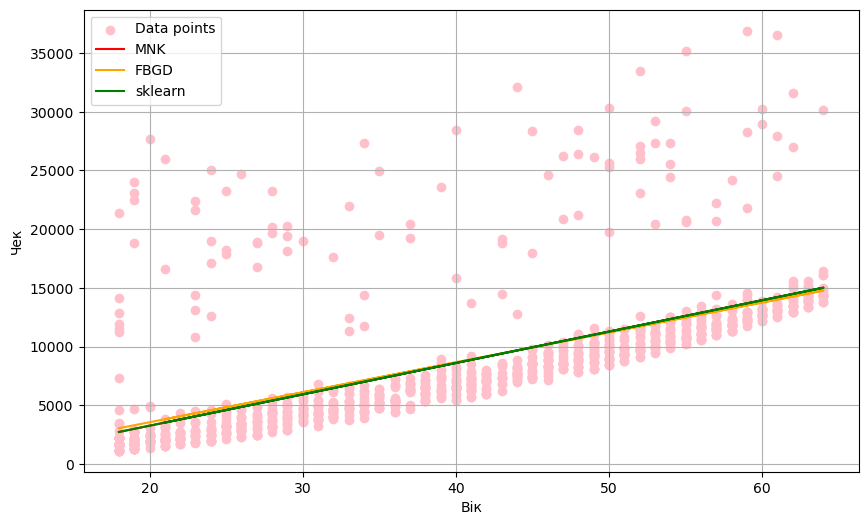

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='pink', label='Data points')
plt.plot(X[:, 0], pred_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd_3, color='orange', label='FBGD')
plt.plot(X[:, 0], predictions_sklearn, color='green', label='sklearn')
plt.xlabel('Вік')
plt.ylabel('Чек')
plt.legend()
plt.grid(True)
plt.show()

Між результатами методу найменших квадратів і використаної функції LinearRegression різниці немає, що логічно, бо LinearRegression під капотом використовує ідентичний розрахунок. У результатах градієнтного спуску результат дещо відрізняється, але зменшивши крок і збільшивши кількість операцій, я досягнула подібного результату, як у МНК. 

Параметри подібні до тих, які я припускала

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [87]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X_s = smoker_df['age'].values.reshape(-1, 1)
y_s = smoker_df['charges'].values

In [90]:
X_s.shape, y_s.shape

((274, 1), (274,))

In [85]:
lin_reg.fit(X_s, y_s)

LinearRegression()

In [91]:
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), 20294.12812691597)

In [92]:
predictions_sklearn = lin_reg.predict(X_s)

In [95]:
rmse_smoker = mean_squared_error(y_s, predictions_sklearn, squared=False)
print(f"Root Mean Squared Error: {rmse_smoker:.2f}")

Root Mean Squared Error: 10711.00


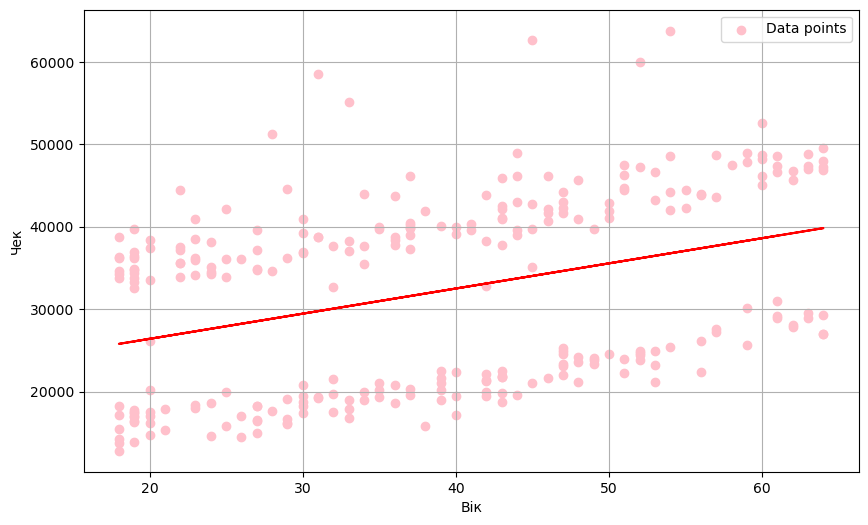

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(X_s[:, 0], y_s, color='pink', label='Data points')
plt.plot(X_s[:, 0], predictions_sklearn, color='red')
plt.xlabel('Вік')
plt.ylabel('Чек')
plt.legend()
plt.grid(True)
plt.show()

Тут вийходить що курці розділені на якісь дві різні групки і наша модель побудувала пряму, яка оптимально підходить для цього, але в компанії я б таке не використовувала, скоріш за все, крім віку, потрібно враховувати розділення цих двох груп у курців. Бо кут нахилу (параметр) я б сказала що у двох груп подібний, але інтерсепт значно відрізняється між ними.